# Filter the original data by the 10,000 users from the subset

In [2]:
# imports

import pandas as pd
import numpy as np
import json
import gzip
import matplotlib.pyplot as plt

In [3]:
# define file paths

path = 'original_data/'
path_reviews = path + 'review-Utah_10.json.gz'
path_subset = 'data/subset.parquet'

In [4]:
# define a generator to read data from the files

def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

In [5]:
# import reviews line by line using the generator, then build a dataframe

reviews = pd.DataFrame(parse(path_reviews))

In [6]:
# check the reviews dataframe

reviews.head(1)

,user_id,name,time,rating,text,pics,resp,gmap_id
0,111182595077674366891,Liz W Poch,1627085008811,5,Paige is the best! Everyone at this branch is ...,None,None,0x87528767d0ec0e4d:0x7a2f1637a6fb6925


In [7]:
# import the subset of the pivot table

subset = pd.read_parquet(path_subset)
subset

gmap_id,0x0:0xd255223c6c0c42e6,0x152e17f2ebc0c523:0x42f5dc12a26572bd,0x15325dadf785f673:0x9ee8c0ca0310e853,0x4065885ad5248b3d:0x9b822de97a85c65d,0x4065f0e9bebbdef5:0xa39da047ffe81e39,0x4065f12112a6fe95:0xf7782e2b18fb66a9,0x4065f123dee5f5cf:0xba7fe8ce7d06b3e8,0x4065f3f9fd551245:0xf9bea78a9e4281,0x4065f478f0660e93:0xa83c1fd7f568fed1,0x4065f49b17082a67:0x8079e884d6a8154b,...,0x89c2e4af036f6859:0x7747897a38667e02,0x89c2ff9adad0bba9:0xcdbcafa93239c417,0x89c39dee75dc1963:0xcba9c3753927ed6c,0x89c3b1a62ade7455:0x108bf810862862fb,0x89c3ce00eb4d9e63:0x7ce7fb610d379f15,0x89c80350fabc8715:0xb7e0d5691eae270d,0x89c80faebad96de5:0xf63ef750265eced9,0x89de0c9ab6311f93:0xaf0e8db707d1ffd9,0x89e483423f8d55ff:0xb01d0d5d8e57ce37,0x89e7c11a8fb8c261:0x3036a2d129f81d1f
user_id,,,,,,,,,,,,,,,,,,,,,
108875955581523057616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115507315643780232736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112921936601761864896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102962316308793245134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116560207578438039358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109489775031945512135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117712940682531767573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101582942131515202521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# get the user_ids from the subset and add my user_id to the list

id_list = list(subset.index)
id_list.append('111717473911684632928')
id_list[-1]

'111717473911684632928'

In [9]:
# filter the reviews to only reviews made by the users in the subset

reviews_sub = reviews[reviews['user_id'].isin(id_list)]

In [10]:
# check to make sure there are 10,001 users in the filtered reviews

reviews_sub['user_id'].nunique()

10001

In [11]:
# check reviews_sub

reviews_sub

,user_id,name,time,rating,text,pics,resp,gmap_id
11,116427980967433332299,Amanda Tapp,1501002398116,5,"Extremely easy to work with auto loans, great ...",None,"{'time': 1514404364057, 'text': 'We are glad t...",0x87528767d0ec0e4d:0x7a2f1637a6fb6925
55,100217552787897641896,Rylee Jones,1566432339019,5,None,None,None,0x875287dced2a1f1f:0xf3764a9211d4f382
102,113719864440680408253,Kylie McDonald,1559939531153,5,Highly recommend this business! They truly car...,None,"{'time': 1559939574524, 'text': 'Thank you, Ky...",0x8752841a66574037:0x6a51c0f67ca3002
121,114710026425309062285,Jess Bird,1540481859746,5,None,None,"{'time': 1596671475713, 'text': 'Thank you, Je...",0x8752f365da14f295:0x264218c77da46a71
131,114105421795834263422,Maxwell McLeod,1544839018564,5,Tom and the team do an excellent job. I have b...,None,None,0x875287d36010a61b:0xab575aa5992155b3
...,...,...,...,...,...,...,...,...
4933722,107626136867067342591,Rachelle Taysom,1525060448816,3,None,None,None,0x875287112eb7ef65:0x3aefb61bbcb5f2a9
4933740,108155158391983335470,Cafe Guru,1603655474608,5,None,None,None,0x875287112eb7ef65:0x3aefb61bbcb5f2a9
4933751,104620742288190585924,Sean Smith,1578929371061,2,None,None,None,0x875287112eb7ef65:0x3aefb61bbcb5f2a9
4933777,102429264321348600901,Eric Anderson,1564336239651,5,None,None,None,0x875287112eb7ef65:0x3aefb61bbcb5f2a9


In [12]:
# check the number of unique businesses

reviews_sub['gmap_id'].nunique()

29040

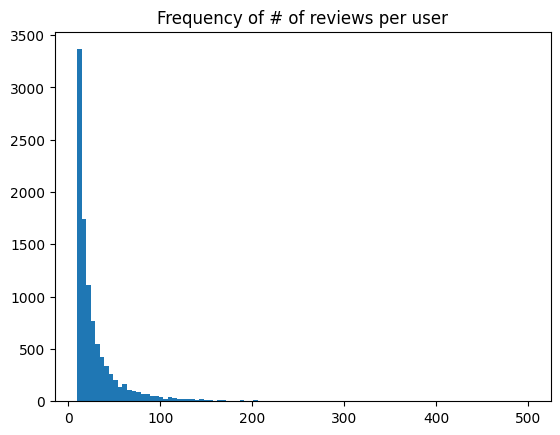

In [13]:
# use a histogram to visualize how many reviews per user

plt.hist(reviews_sub.groupby('user_id')['name'].count(), bins=100)
plt.title('Frequency of # of reviews per user');

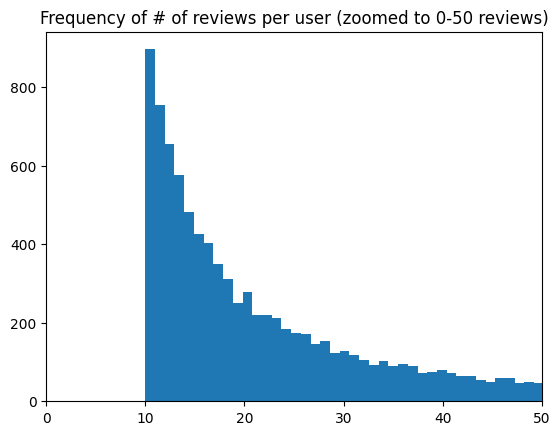

In [14]:
# zoom up to review counts under 50

plt.hist(reviews_sub.groupby('user_id')['name'].count(), bins=500)
plt.xlim(0, 50)
plt.title('Frequency of # of reviews per user (zoomed to 0-50 reviews)');

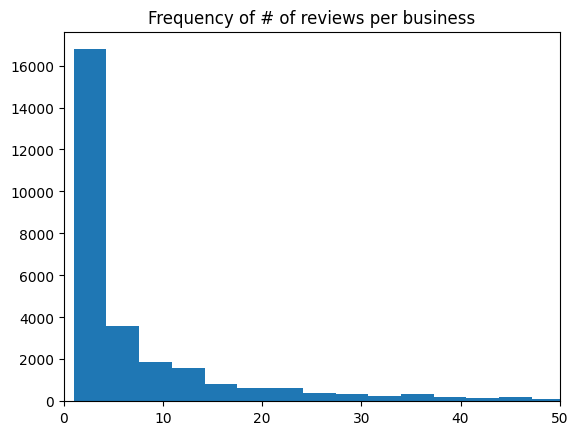

In [17]:
# use a histogram to visualize how many reviews per user

plt.hist(reviews_sub.groupby('gmap_id')['name'].count(), bins=150)
plt.xlim(0, 50)
plt.title('Frequency of # of reviews per business');

In [13]:
# export the reviews_sub

reviews_sub.to_parquet('data/subset_reviews.parquet', index=False)